# Mounting drive for file access



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Dependencies

In [2]:
!pip install python-dateutil


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install import-ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install -U -q PyDrive


# Libraries

In [5]:
#%%
#LIBRARIES
#Custom Library Connection
import sys
import os
import import_ipynb
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Data Processing
import pandas as pd
import numpy as np

import datetime

#Table Formatter
from google.colab.data_table import DataTable
DataTable.max_columns = 50

#Plots
import matplotlib.pyplot as plt
import matplotlib.dates
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

#LSTM
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

np.random.seed(1)
tf.random.set_seed(1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed


## Importing Custom Libraries

In [6]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [7]:
module_models = drive.CreateFile({'id':'1derReHVn0P30RFlGd1TJ_IYd0RzidwCN'})
module_models.GetContentFile('models.ipynb')
module_models

GoogleDriveFile({'id': '1derReHVn0P30RFlGd1TJ_IYd0RzidwCN', 'kind': 'drive#file', 'etag': '"MTY0Nzk2NTMxMDU2OQ"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1derReHVn0P30RFlGd1TJ_IYd0RzidwCN', 'webContentLink': 'https://drive.google.com/uc?id=1derReHVn0P30RFlGd1TJ_IYd0RzidwCN&export=download', 'alternateLink': 'https://colab.research.google.com/drive/1derReHVn0P30RFlGd1TJ_IYd0RzidwCN', 'embedLink': 'https://drive.google.com/file/d/1derReHVn0P30RFlGd1TJ_IYd0RzidwCN/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/vnd.google.colaboratory', 'thumbnailLink': 'https://lh5.googleusercontent.com/ijm_7wivTHPZH1FxB-pz17kt9kBhTsfXWYXQFL45cyevONXQTF2TCQNLlva5XcIZoOUlAfkhu1ADtyw=s220', 'title': 'models.ipynb', 'mimeType': 'application/vnd.google.colaboratory', 'description': 'Colaboratory notebook', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': F

In [13]:
from models import*

In [14]:
split(pd.DataFrame(np.random.randint(0,100,size=(10, 3)), columns=list('ABC')) ,0.8)

NameError: ignored

In [ ]:
module_helper = drive.CreateFile({'id':'18rMYExGP6aHMSVHValrZjXfb_7ll-T4v'})
module_helper.GetContentFile('helperFunctions.ipynb')
module_helper

In [ ]:
from helperFunctions import*

In [ ]:
uniqueValues([1,1,1,12,2,2,3])

# General Information about Data

In [15]:

#%%
#Reading Data from CSV 
path="/content/gdrive/My Drive/Thesis-Project/data/merged.csv"
df = pd.read_csv(path)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,21,22,23,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Session ID,User ID,Event Name,Elapsed Time,Nome Componente,Inizio Caricamento,Fine Caricamento,Descrizione Evento,Stack Trace,...,Compromesso,Memoria Usata,Tipo Rete,Qualita Rete,Errore,Path Errore,Custom Field Errore,Status Errore,Messaggio Errore,Exception
0,0,3037411,743160,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,...,False,105.30 mb,4G,3,NaN,NaN,NaN,NaN,undefined is not an object (evaluating 'n.desc...,NaN
1,1,3037412,743160,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,...,False,105.81 mb,4G,3,NaN,NaN,NaN,NaN,undefined is not an object (evaluating 'n.desc...,NaN
2,2,3037413,743160,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,...,False,105.64 mb,4G,3,NaN,NaN,NaN,NaN,undefined is not an object (evaluating 'n.desc...,NaN
3,3,3037414,743160,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,...,False,105.92 mb,4G,3,NaN,NaN,NaN,NaN,undefined is not an object (evaluating 'n.desc...,NaN
4,4,3037415,743160,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,...,False,105.66 mb,4G,3,NaN,NaN,NaN,NaN,undefined is not an object (evaluating 'n.desc...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474937,1474937,4345876,9429,Vendita,805.0,Load Prodotti from server,2022-02-28 20:04:34 +0000,2022-02-28 20:04:35 +0000,Load Prodotti from server,NaN,...,False,78.47 mb,4G,2,NaN,NaN,NaN,NaN,NaN,NaN
1474938,1474938,4345879,683495,Vendita,2.0,Load Prodotti from cache,2022-02-28 20:04:36 +0000,2022-02-28 20:04:36 +0000,Load Prodotti from cache,NaN,...,False,49.31 mb,wifi,2,NaN,NaN,NaN,NaN,NaN,NaN
1474939,1474939,3900383,535144,Home,58.0,Load Agenda from storage,2022-02-21 04:57:01 +0000,2022-02-21 04:57:01 +0000,Load Agenda from storage,NaN,...,False,58.55 mb,wifi,0,NaN,NaN,NaN,NaN,NaN,NaN
1474940,1474940,3900382,535144,535144,NaN,NaN,NaN,NaN,Set User ID,NaN,...,False,57.89 mb,wifi,0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.columns

Index(['Unnamed: 0', 'Session ID', 'User ID', 'Event Name', 'Elapsed Time',
       'Nome Componente', 'Inizio Caricamento', 'Fine Caricamento',
       'Descrizione Evento', 'Stack Trace', 'Tipo Evento', 'SO', 'Proxied',
       'Device ID', 'App Version', 'Priorita', 'Timestamp', 'Compromesso',
       'Memoria Usata', 'Tipo Rete', 'Qualita Rete', 'Errore', 'Path Errore',
       'Custom Field Errore', 'Status Errore', 'Messaggio Errore',
       'Exception'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474942 entries, 0 to 1474941
Data columns (total 27 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1474942 non-null  int64  
 1   Session ID           1474942 non-null  int64  
 2   User ID              1474942 non-null  int64  
 3   Event Name           1473808 non-null  object 
 4   Elapsed Time         787152 non-null   float64
 5   Nome Componente      787152 non-null   object 
 6   Inizio Caricamento   787152 non-null   object 
 7   Fine Caricamento     787152 non-null   object 
 8   Descrizione Evento   1473784 non-null  object 
 9   Stack Trace          24 non-null       object 
 10  Tipo Evento          1474942 non-null  object 
 11  SO                   1474942 non-null  object 
 12  Proxied              1474942 non-null  bool   
 13  Device ID            1474942 non-null  object 
 14  App Version          1474942 non-null  object 
 15

## Date Range

In [ ]:
start_date = min(df["Timestamp"]) #these dates are kept as params to not calculating again in the rest of the application
end_date = max(df["Timestamp"])
print("Starting Time: {}\nEnding Time: {}".format(start_date, end_date))

Starting Time: 2022-02-01 00:00:23.493
Ending Time: 2022-02-28 9:57:45.312 AM


## Columns

In [ ]:
print("Shape of dataframe:",df.shape)
df.dtypes

Shape of dataframe: (1474942, 27)


Unnamed: 0               int64
Session ID               int64
User ID                  int64
Event Name              object
Elapsed Time           float64
Nome Componente         object
Inizio Caricamento      object
Fine Caricamento        object
Descrizione Evento      object
Stack Trace             object
Tipo Evento             object
SO                      object
Proxied                   bool
Device ID               object
App Version             object
Priorita                object
Timestamp               object
Compromesso               bool
Memoria Usata           object
Tipo Rete               object
Qualita Rete             int64
Errore                  object
Path Errore             object
Custom Field Errore     object
Status Errore          float64
Messaggio Errore        object
Exception               object
dtype: object

In [ ]:
df.columns

Index(['Unnamed: 0', 'Session ID', 'User ID', 'Event Name', 'Elapsed Time',
       'Nome Componente', 'Inizio Caricamento', 'Fine Caricamento',
       'Descrizione Evento', 'Stack Trace', 'Tipo Evento', 'SO', 'Proxied',
       'Device ID', 'App Version', 'Priorita', 'Timestamp', 'Compromesso',
       'Memoria Usata', 'Tipo Rete', 'Qualita Rete', 'Errore', 'Path Errore',
       'Custom Field Errore', 'Status Errore', 'Messaggio Errore',
       'Exception'],
      dtype='object')

# Formatting Dataframe

In [ ]:
#Formatting DF
#Convert dataframe "Timestamp" column from string to datetime type of object, therefore we can simplify problem as a timeseries prediction, 
#also timestamp is a unique value in our table that we can analyze data based on it

#df['Timestamp'] = [parser.parse(df["Timestamp"].iloc[i]) for i in range(len(df)) ]
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values(by='Timestamp') #Can be changed to Session ID

df = df.drop('Unnamed: 0',axis=1)
df = df.reset_index(drop=True)

df["Memoria Usata"] = [float(i[:-3]) for i in df["Memoria Usata"]]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474942 entries, 0 to 1474941
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Session ID           1474942 non-null  int64         
 1   User ID              1474942 non-null  int64         
 2   Event Name           1473808 non-null  object        
 3   Elapsed Time         787152 non-null   float64       
 4   Nome Componente      787152 non-null   object        
 5   Inizio Caricamento   787152 non-null   object        
 6   Fine Caricamento     787152 non-null   object        
 7   Descrizione Evento   1473784 non-null  object        
 8   Stack Trace          24 non-null       object        
 9   Tipo Evento          1474942 non-null  object        
 10  SO                   1474942 non-null  object        
 11  Proxied              1474942 non-null  bool          
 12  Device ID            1474942 non-null  object        
 1

In [ ]:
df.columns

Index(['Session ID', 'User ID', 'Event Name', 'Elapsed Time',
       'Nome Componente', 'Inizio Caricamento', 'Fine Caricamento',
       'Descrizione Evento', 'Stack Trace', 'Tipo Evento', 'SO', 'Proxied',
       'Device ID', 'App Version', 'Priorita', 'Timestamp', 'Compromesso',
       'Memoria Usata', 'Tipo Rete', 'Qualita Rete', 'Errore', 'Path Errore',
       'Custom Field Errore', 'Status Errore', 'Messaggio Errore',
       'Exception'],
      dtype='object')

In [ ]:
for i in list(df.columns):
  print(df[i].value_counts())
  print("\n\n\n")

2872635    1
3856037    1
3856089    1
3856088    1
3856087    1
          ..
3364292    1
3364291    1
3364290    1
3364289    1
4347576    1
Name: Session ID, Length: 1474942, dtype: int64




743160    237774
7130       24934
693604     14722
665734     12159
352191      9378
           ...  
531811         8
2852           5
746782         4
11734          4
664601         3
Name: User ID, Length: 878, dtype: int64




exception        608665
Client Detail    296915
Vendita          259336
Home             195385
Contacts          35516
                  ...  
664601                1
671265                1
744671                1
746753                1
2340                  1
Name: Event Name, Length: 883, dtype: int64




1.0         106825
0.0          47200
2.0          39929
3.0          13402
4.0           6478
             ...  
20955.0          1
19484.0          1
24925.0          1
16990.0          1
377911.0         1
Name: Elapsed Time, Length: 22388, dtype: int64






In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Session ID,1474942.0,3.610106e+06,4.257792e+05,2872635.0,3241370.25,3610105.50,3978840.75,4.347576e+06
User ID,1474942.0,6.014954e+05,2.127366e+05,2005.0,560204.00,711445.00,743160.00,7.510000e+05
Elapsed Time,787152.0,2.675005e+04,2.402765e+06,-8.0,3.00,257.00,1470.00,1.126910e+09
Memoria Usata,1474942.0,7.265091e+01,3.089250e+01,10.3,49.64,68.23,89.33,4.035300e+02
Qualita Rete,1474942.0,2.147225e+00,1.389685e+00,-1.0,1.00,2.00,3.00,4.000000e+00
Status Errore,91932.0,4.161886e+02,3.363658e+01,400.0,403.00,403.00,403.00,5.000000e+02


# Plots

In [ ]:
#plot("Timestamp","Memory Usage[mb]",df["Timestamp"],df["Memoria Usata"],"o",1 ,20 ,20)

In [ ]:
#plot("Timestamp","Memory Usage[mb]",df["Timestamp"],df["Memoria Usata"],1,1 ,20 ,20)

In [ ]:
# fig = go.Figure()
# fig = px.scatter(df, x="Memoria Usata", y="Elapsed Time", title="Memory Usage vs Elapsed Time")
# fig.show()

In [ ]:
df["date"] = [df["Timestamp"].iloc[i].date() for i in range(len(df))]
date_dct = uniqueValues(df.date)
grouped_date = df.groupby(df.date)

dates=[grouped_date.get_group(x) for x in grouped_date.groups]

In [ ]:
for i in dates:
  print(len(i),end=", ")
print("\nMinimum number of samples tracked a day: ", min([len(i) for i in dates]))

48511, 98684, 70552, 98612, 802, 2826, 63231, 61155, 77163, 70653, 69877, 6641, 3909, 79709, 63042, 72411, 68620, 60131, 8756, 3491, 51995, 73728, 85737, 80294, 67783, 9715, 4127, 72787, 
Minimum number of samples tracked a day:  802


In [ ]:
avg_mem_per_day = sum([len(i) for i in dates])/len(dates)
print("Average samples per day:",avg_mem_per_day)

Average samples per day: 52676.5


In [ ]:
#Undo comment below for daily memory usage plots
# for i in dates:
#     plot("Timestamp_{}".format(str(min(i.date))),"Memory Usage",i["Timestamp"],i["Memoria Usata"],"o",1 ,20 ,20)
#     plot("Timestamp_{}".format(str(min(i.date))),"Memory Usage",i["Timestamp"],i["Memoria Usata"],1,1 ,20 ,20)
  

# Taking Elapsed time into Account

In [ ]:
# import plotly.express as px
# df_plot_3d = df.loc[:, ['Timestamp', 'Memoria Usata', 'Elapsed Time']]
# fig = px.scatter_3d(df_plot_3d, x='Timestamp', y='Memoria Usata', z='Elapsed Time')
# fig.show()

In [ ]:
# df_plot_3d

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474942 entries, 0 to 1474941
Data columns (total 27 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Session ID           1474942 non-null  int64         
 1   User ID              1474942 non-null  int64         
 2   Event Name           1473808 non-null  object        
 3   Elapsed Time         787152 non-null   float64       
 4   Nome Componente      787152 non-null   object        
 5   Inizio Caricamento   787152 non-null   object        
 6   Fine Caricamento     787152 non-null   object        
 7   Descrizione Evento   1473784 non-null  object        
 8   Stack Trace          24 non-null       object        
 9   Tipo Evento          1474942 non-null  object        
 10  SO                   1474942 non-null  object        
 11  Proxied              1474942 non-null  bool          
 12  Device ID            1474942 non-null  object        
 1

In [ ]:
df["Fine Caricamento"].isnull().any().any()

True

In [ ]:
# elapsed_nan = []
# for i in range(len(df)):
#   if np.isnan(df.iloc[i]["Elapsed Time"]) and (not np.isnan(df.iloc[i]["Inizio Caricamento"]) or not np.isnan(df.iloc[i]["Fine Caricamento"])):
#     elapsed_nan.append(df.iloc[i])

# elapsed_nan


[]

In [ ]:
# elapsed_nan = []
# for i in range(len(df)):
#   if np.isnan(df.iloc[i]["Elapsed Time"]) and (not np.isnan(df.iloc[i]["Inizio Caricamento"]) and not np.isnan(df.iloc[i]["Fine Caricamento"])):
#     elapsed_nan.append(df.iloc[i])

# elapsed_nan

[]

Based on the above output of the code, when elapsed time is not defined, initial load or final load is not defined

# ARIMAX-SARIMAX Model

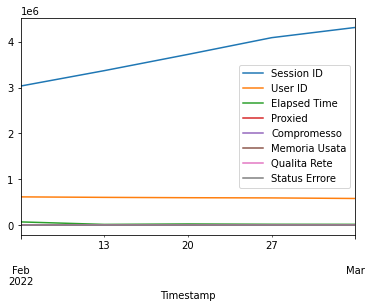

In [ ]:
df_MA = df
df_MA = df.set_index(df_MA["Timestamp"])
resample= df_MA.resample("W")
tmp_mean = resample.mean()
tmp_mean.plot()
plt.show()

https://analyticsindiamag.com/general-overview-of-time-series-data-analysis/

# Elapsed Time and Memory Usage

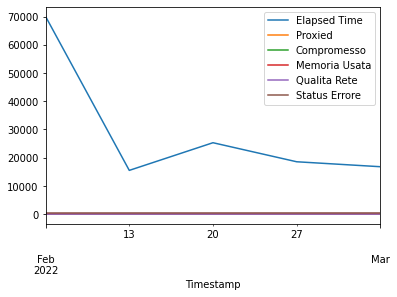

In [ ]:
df_MA.drop(columns=['Session ID','User ID'], inplace=True)
resample= df_MA.resample("W")
tmp_mean = resample.mean()
tmp_mean.plot()
plt.show()

## Linear Regression between Elapsed Time and Memory Usage

In [ ]:
df_E_M = df.loc[:, ['Memoria Usata',"Elapsed Time"]]

In [ ]:
df_E_M

,Memoria Usata,Elapsed Time
0,56.86,NaN
1,57.89,53.0
2,58.55,7.0
3,63.83,4.0
4,64.02,968.0
...,...,...
1474937,41.81,5668.0
1474938,49.27,NaN
1474939,49.28,NaN
1474940,49.31,NaN


## Methods for Linear Regression

In [ ]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()

Estimated coefficients:
b_0 = 72.65974524772041        
b_1 = -3.3041084715910244e-07


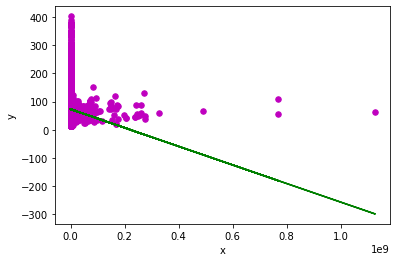

In [ ]:
b = estimate_coef(df_E_M["Elapsed Time"], df_E_M["Memoria Usata"])
print("Estimated coefficients:\nb_0 = {}  \
      \nb_1 = {}".format(b[0], b[1]))

# plotting regression line
plot_regression_line(df_E_M["Elapsed Time"], df_E_M["Memoria Usata"], b)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

# defining feature matrix(X) and response vector(y)
df_E_M= df_E_M.fillna(0) #Filling Nan values with 0 for regression
X = df_E_M["Elapsed Time"]
y =  df_E_M["Memoria Usata"]





In [ ]:
X.isnull().values.any()

False

In [ ]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = np.array(X[:int(len(X)*0.6)]).reshape(-1,1),np.array(X[int(len(X)*0.6):]).reshape(-1,1),np.array(y[:int(len(y)*0.6)]).reshape(-1,1),np.array(y[int(len(y)*0.6):]).reshape(-1,1)

X_train=X_train.reshape(-1, 1)

In [ ]:
y_train

array([[56.86],
       [57.89],
       [58.55],
       ...,
       [45.83],
       [63.48],
       [39.62]])

In [ ]:
# create linear regression object
reg = linear_model.LinearRegression()

In [ ]:
reg.fit(X_train, y_train)

LinearRegression()

Coefficients:  [[-3.56485376e-08]]
Variance score: -0.09376908697775477


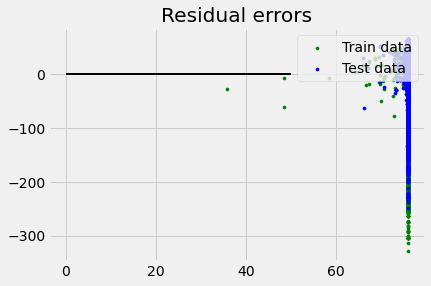

In [ ]:





# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
			color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
			color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Residual errors")

## method call for showing the plot
plt.show()


In [ ]:
len(y_train)

884965

In [ ]:
len(X_train)

884965

In [ ]:
ayca = np.array([1,1,1,12,2])
ayca= ayca.reshape(-1, 1)
ayca

array([[ 1],
       [ 1],
       [ 1],
       [12],
       [ 2]])

# Rest

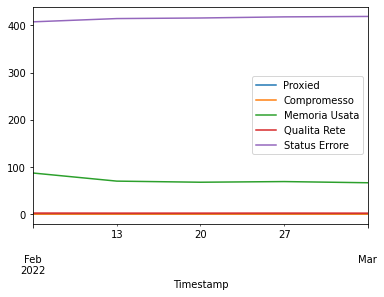

In [ ]:
df_MA.drop(columns=['Elapsed Time'], inplace=True)
resample= df_MA.resample("W")
tmp_mean = resample.mean()
tmp_mean.plot()
plt.show()

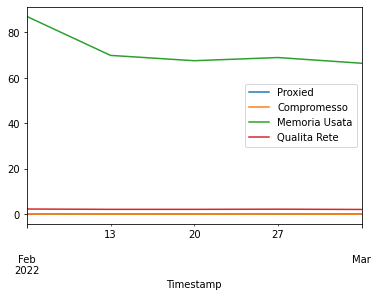

In [ ]:
df_MA.drop(columns=['Status Errore'], inplace=True)
resample= df_MA.resample("W")
tmp_mean = resample.mean()
tmp_mean.plot()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474942 entries, 0 to 1474941
Data columns (total 27 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Session ID           1474942 non-null  int64         
 1   User ID              1474942 non-null  int64         
 2   Event Name           1473808 non-null  object        
 3   Elapsed Time         787152 non-null   float64       
 4   Nome Componente      787152 non-null   object        
 5   Inizio Caricamento   787152 non-null   object        
 6   Fine Caricamento     787152 non-null   object        
 7   Descrizione Evento   1473784 non-null  object        
 8   Stack Trace          24 non-null       object        
 9   Tipo Evento          1474942 non-null  object        
 10  SO                   1474942 non-null  object        
 11  Proxied              1474942 non-null  bool          
 12  Device ID            1474942 non-null  object        
 1